In [9]:
%matplotlib inline

import sys
import math
from copy import deepcopy

import geopandas as gpd

sys.path.insert(0, "../")
from weavingspace.tile_unit import TileUnit
from weavingspace.tile_map import Tiling
from weavingspace import tiling_utils
import shapely.geometry as geom
from shapely import line_interpolate_point
import geopandas as gpd

<Axes: >

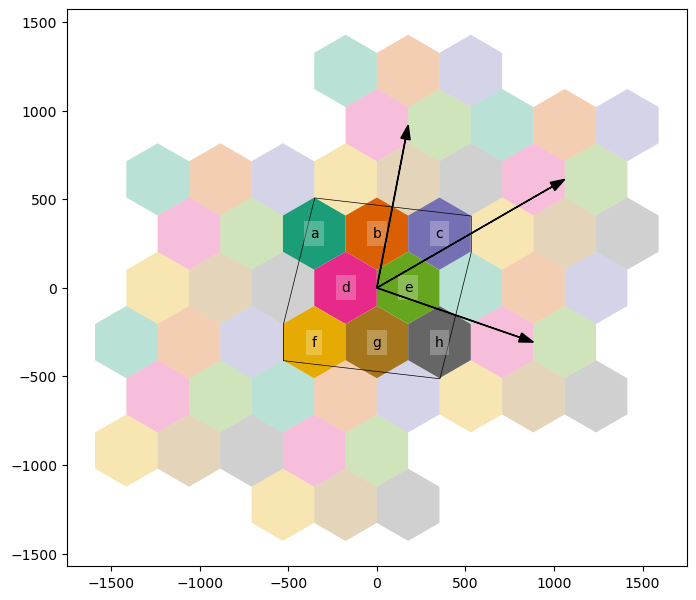

In [11]:
t = TileUnit(tiling_type = "hex-colouring", n = 8, offset = 2/3)
t.plot(r = 1, show_vectors = True, show_prototile = True, show_reg_prototile = False)

In [ ]:
ak = gpd.read_file("data/imd-auckland-2018.gpkg")

# Scratch pad
A barebones notebook for testing basic operations of the package. The above code loads necessary libraries and allows for making a map.

In [ ]:
tile = TileUnit(tiling_type="square-colouring", 
                code="3.3.4.3.4", 
                spacing=500, 
                n=8, 
                crs=ak.crs) \
                  .inset_prototile(10).inset_tiles(0)
tile.plot(r=1)


In [ ]:
n = tile.tiles.shape[0]
vars = dict(zip(list("abcdefghijkl")[:n], [x for x in ak.columns if "Rank" in x][:n]))
cmaps = dict(zip(vars.values(), ["Reds", "Oranges", "Greens", "Blues", 
                                 "Purples", "Greys", "YlOrBr", "PuRd", 
                                 "YlOrRd", "BuGn", "BuPu", "YlGnBu" ][:n]))
tiling = Tiling(tile, ak)
map = tiling.get_tiled_map()
fig = map.render(variables=vars, colourmaps=cmaps, use_ellipse=True)